## Proggetto Data Base, analitics

Fonte: (https://www.ilmeteo.it/portale/archivio-meteo/Cesena/2024/Maggio)

(https://www.ilmeteo.it/portale/archivio-meteo/Milano/2025/Maggio)

(https://www.ilmeteo.it/portale/archivio-meteo/Bologna/2025/Maggio)

(https://www.ilmeteo.it/portale/archivio-meteo/Roma/2025/Maggio)


Lo scopo del progetto è analizzare i dati del tempo in due punti diversi Cesena(lo stesso mese Maggio tra i due anni) Roma (Media, Max, Min, presenza delle pioggie)


Lo scopo del progetto è analizzare i dati del tempo di tre città Bologna, Roma, Milano (Temperatura Media, Max, Min, Umidità, pressione, presenza delle pioggie ecc.)

Nella prima parte analizzo le temperature delle città: Roma, Bologna e Milano e successivamente provare a creare una previsone del tempo di un unica città 


Falcoltativo: provare a prevedere le previsioni del prossimo anno 

#### Dati

In [112]:
# Importo le librerie con cui ho bisogno

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown                   # Utilizzo la libreria per creare il menù a tendina

In [ ]:
# Carico i file che mi servono

df_Temp_Bologna_Maggio = pd.read_csv('Bologna-2025-Maggio.csv', encoding='latin-1')
df_Temp_Milano_Maggio = pd.read_csv('Milano-2025-Maggio.csv', encoding='latin-1')
df_Temp_Roma_Maggio = pd.read_csv('Roma-2025-Maggio.csv', encoding='latin-1')

In [114]:
# Verifico che venga letto i dati

df_Temp_Bologna_Maggio.head(31)
df_Temp_Milano_Maggio.head(31)
df_Temp_Roma_Maggio.head(31)

,LOCALITA,DATA,TMEDIA °C,TMIN °C,TMAX °C,PUNTORUGIADA °C,UMIDITA %,VISIBILITA km,VENTOMEDIA km/h,VENTOMAX km/h,RAFFICA km/h,PRESSIONESLM mb,PRESSIONEMEDIA mb,PIOGGIA mm,FENOMENI
0,Roma,01/05/2025,19,12,27,11,59,20,0,0,0,1018,0,0,NaN
1,Roma,02/05/2025,19,12,26,11,60,18,0,0,0,1019,0,0,NaN
2,Roma,03/05/2025,19,12,25,11,63,19,0,0,0,1019,0,0,NaN
3,Roma,04/05/2025,19,14,22,9,55,20,0,0,0,1013,0,0,pioggia
4,Roma,05/05/2025,19,17,22,15,75,19,0,22,0,1008,0,0,pioggia temporale
5,Roma,06/05/2025,18,16,22,13,74,21,0,0,0,1010,0,0,pioggia temporale
6,Roma,07/05/2025,17,14,21,11,71,18,0,0,0,1013,0,0,pioggia
7,Roma,08/05/2025,16,13,20,11,71,21,0,0,0,1012,0,0,pioggia
8,Roma,09/05/2025,16,10,22,9,66,19,0,0,0,1013,0,0,NaN
9,Roma,10/05/2025,18,11,23,10,62,20,0,0,0,1016,0,0,NaN


In [115]:
# Eseguo in un unica cella i dataframe delle celle

# Aggiungo una colonna "CITTA" per ciascun DataFrame (mi permette di filtrare facilmente i dati per città)
df_Temp_Bologna_Maggio['CITTA'] = 'Bologna'
df_Temp_Milano_Maggio['CITTA'] = 'Milano'
df_Temp_Roma_Maggio['CITTA'] = 'Roma'

# Concatena i tre DataFrame in uno solo
df_Temp_Maggio = pd.concat([
    df_Temp_Bologna_Maggio,
    df_Temp_Milano_Maggio,
    df_Temp_Roma_Maggio
], ignore_index=True)           # Il comando "ignore_index=True" azzera gli indici per evitare duplicazioni.

# Visualizza le informazioni del DataFrame combinato
df_Temp_Maggio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   LOCALITA           93 non-null     object
 1   DATA               93 non-null     object
 2   TMEDIA °C          93 non-null     int64 
 3   TMIN °C            93 non-null     int64 
 4   TMAX °C            93 non-null     int64 
 5   PUNTORUGIADA °C    93 non-null     int64 
 6   UMIDITA %          93 non-null     int64 
 7   VISIBILITA km      93 non-null     int64 
 8   VENTOMEDIA km/h    93 non-null     int64 
 9   VENTOMAX km/h      93 non-null     int64 
 10  RAFFICA km/h       93 non-null     int64 
 11  PRESSIONESLM mb    93 non-null     int64 
 12  PRESSIONEMEDIA mb  93 non-null     int64 
 13  PIOGGIA mm         93 non-null     int64 
 14  FENOMENI           39 non-null     object
 15  CITTA              93 non-null     object
dtypes: int64(12), object(4)
memory usage: 11.8+ KB

In [117]:
# Converto la colonna "DATA" in oggetti datetime per rendere comprensibile e gestibile per operazioni temporali.
# Ho abilitato "dayfirst=True" in modo che legga il primo numero come giorno anziché mese

df_Temp_Maggio['DATA'] = pd.to_datetime(df_Temp_Maggio['DATA'], dayfirst=True)  

In [ ]:
# Stampo l'elenco dei nomi delle colonne presenti nel DataFrame
print(df_Temp_Maggio.columns)


Index(['LOCALITA', 'DATA', 'TMEDIA °C', 'TMIN °C', 'TMAX °C',
       'PUNTORUGIADA °C', 'UMIDITA %', 'VISIBILITA km', 'VENTOMEDIA km/h',
       'VENTOMAX km/h', 'RAFFICA km/h', 'PRESSIONESLM mb', 'PRESSIONEMEDIA mb',
       'PIOGGIA mm', 'FENOMENI', 'CITTA'],
      dtype='object')


In [ ]:
# Stampo da pandas le etichette delle colonne (più leggibile)
print(df_Temp_Maggio.columns.tolist())


['LOCALITA', 'DATA', 'TMEDIA °C', 'TMIN °C', 'TMAX °C', 'PUNTORUGIADA °C', 'UMIDITA %', 'VISIBILITA km', 'VENTOMEDIA km/h', 'VENTOMAX km/h', 'RAFFICA km/h', 'PRESSIONESLM mb', 'PRESSIONEMEDIA mb', 'PIOGGIA mm', 'FENOMENI', 'CITTA']


#### 1. Temperatura Min, Media e Max

#### Obiettivo
Analizzare i dati di temperatura media (ma anche minima e massima) di tre città nel mese di maggio 2025.

In [120]:
# Troviamo i nomi delle colonne giuste, dato che ci possono essere spazi invisibili o simboli come °C che non riconosce

# Cerca la prima colonna ([0]) il cui nome contiene "TMIN", "TMEDIA" o "TMAX" in qualsiasi maiuscolo o minuscolo
col_tmin = [col for col in df_Temp_Maggio.columns if 'TMIN' in col.upper()][0]
col_tmedia = [col for col in df_Temp_Maggio.columns if 'TMEDIA' in col.upper()][0]
col_tmax = [col for col in df_Temp_Maggio.columns if 'TMAX' in col.upper()][0]

print(f"TMIN: {col_tmin}, TMEDIA: {col_tmedia}, TMAX: {col_tmax}")

TMIN: TMIN °C, TMEDIA: TMEDIA °C, TMAX: TMAX °C


Convertiamo le colonne in numeri perché per fare calcoli le colonne devono essere numeriche

In [121]:
# errors='coerce' serve per trasformare eventuali valori non validi in NaN (mancanti), così da non causare errori nei calcoli.
df_Temp_Maggio[col_tmin] = pd.to_numeric(df_Temp_Maggio[col_tmin], errors='coerce')
df_Temp_Maggio[col_tmedia] = pd.to_numeric(df_Temp_Maggio[col_tmedia], errors='coerce')
df_Temp_Maggio[col_tmax] = pd.to_numeric(df_Temp_Maggio[col_tmax], errors='coerce')

In [122]:
# Calcoliamo la media per ogni città
medie_per_citta = df_Temp_Maggio.groupby('LOCALITA')[[col_tmin, col_tmedia, col_tmax]].mean()

print(medie_per_citta)

            TMIN °C  TMEDIA °C    TMAX °C
LOCALITA                                 
Bologna   13.129032  18.645161  24.161290
Milano    13.967742  18.774194  23.645161
Roma      13.322581  18.548387  23.774194


Dopo aver trovato i dati  si crea il grafico

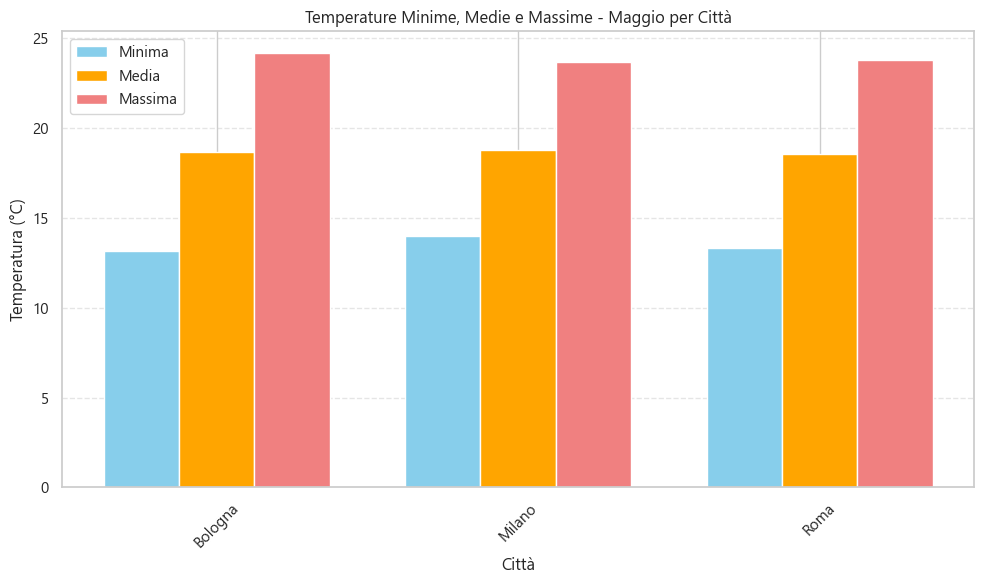

In [123]:
# Impostazioni base
plt.figure(figsize=(10, 6))
width = 0.25
x = range(len(medie_per_citta))

# Plot, disegna le barre: minime a sinistra, medie al centro, massime a destra
plt.bar([i - width for i in x], medie_per_citta[col_tmin], width=width, label='Minima', color='skyblue')
plt.bar(x, medie_per_citta[col_tmedia], width=width, label='Media', color='orange')
plt.bar([i + width for i in x], medie_per_citta[col_tmax], width=width, label='Massima', color='lightcoral')

# Etichette sull'asse X
plt.xticks(x, medie_per_citta.index, rotation=45)

# Titolo e assi
plt.title('Temperature Minime, Medie e Massime - Maggio per Città')
plt.xlabel('Città')
plt.ylabel('Temperatura (°C)')
plt.legend()

# Layout e griglia
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

#### 2. Temperatura di ogni giorno di quel mese

#### Obiettivo
Creare un grafico comparativo che mostra:

Temperatura minima (linea tratteggiata --)

Temperatura media (linea normale)

Temperatura massima (linea puntinata :)
per ciascuna delle tre città selezionate.

Cerco i DataFrame da analizzare

In [124]:
# Le 3 città di interesse
citta_interesse = ['Bologna', 'Milano', 'Roma']  # sostituisci con i nomi reali

# Filtra per queste città
df_filtrato = df_Temp_Maggio[df_Temp_Maggio['LOCALITA'].isin(citta_interesse)]      # isin controlla se i valori in una colonna (o in un DataFrame) sono presenti in un insieme di valori specificato

# Trova i nomi delle colonne di temperatura (come prima)
col_tmin = [col for col in df_filtrato.columns if 'TMIN' in col.upper()][0]
col_tmedia = [col for col in df_filtrato.columns if 'TMEDIA' in col.upper()][0]
col_tmax = [col for col in df_filtrato.columns if 'TMAX' in col.upper()][0]

# Converti in numerico (se non già fatto)
df_filtrato[col_tmin] = pd.to_numeric(df_filtrato[col_tmin], errors='coerce')
df_filtrato[col_tmedia] = pd.to_numeric(df_filtrato[col_tmedia], errors='coerce')
df_filtrato[col_tmax] = pd.to_numeric(df_filtrato[col_tmax], errors='coerce')

print(df_filtrato)

   LOCALITA       DATA  TMEDIA °C  TMIN °C  TMAX °C  PUNTORUGIADA °C  \
0   Bologna 2025-05-01         20       13       27                9   
1   Bologna 2025-05-02         22       15       29               11   
2   Bologna 2025-05-03         22       16       29                9   
3   Bologna 2025-05-04         21       14       27               11   
4   Bologna 2025-05-05         20       15       23               13   
..      ...        ...        ...      ...      ...              ...   
88     Roma 2025-05-27         20       15       25               13   
89     Roma 2025-05-28         20       14       27               13   
90     Roma 2025-05-29         22       17       30               14   
91     Roma 2025-05-30         23       16       28               11   
92     Roma 2025-05-31         24       17       29               12   

    UMIDITA %  VISIBILITA km  VENTOMEDIA km/h  VENTOMAX km/h  RAFFICA km/h  \
0          52             20                0            

Creo il grafico con menù a tendina

In [125]:
# Lista delle città
citta_opzioni = ['Tutte'] + sorted(df_Temp_Maggio['LOCALITA'].unique().tolist())

# Colori personalizzati per le città 
colori_citta = {
    'Milano': 'blue',
    'Roma': 'red',
    'Bologna': 'green'
}

# Converto le colonne in numerico (una volta sola)
df_Temp_Maggio[col_tmin] = pd.to_numeric(df_Temp_Maggio[col_tmin], errors='coerce')
df_Temp_Maggio[col_tmedia] = pd.to_numeric(df_Temp_Maggio[col_tmedia], errors='coerce')
df_Temp_Maggio[col_tmax] = pd.to_numeric(df_Temp_Maggio[col_tmax], errors='coerce')

# Funzione interattiva
def grafico_temperature(citta_scelta):
    plt.figure(figsize=(14,8))

    if citta_scelta == 'Tutte':             # Cicla su ogni città presente nella colonna LOCALITA del DataFrame
        for citta in df_Temp_Maggio['LOCALITA'].unique():
            df_citta = df_Temp_Maggio[df_Temp_Maggio['LOCALITA'] == citta].sort_values('DATA')
            colore = colori_citta.get(citta, None)                  # Prende il colore specifico da un dizionario colori_citta. Se non lo trova, usa None (Matplotlib userà un colore di default)

            # Stili diversi delle linee
            plt.plot(df_citta['DATA'], df_citta[col_tmin], label=f'{citta} - Min', linestyle='--', color=colore)
            plt.plot(df_citta['DATA'], df_citta[col_tmedia], label=f'{citta} - Media', color=colore)
            plt.plot(df_citta['DATA'], df_citta[col_tmax], label=f'{citta} - Max', linestyle=':', color=colore)

    # Se non è presente il colore della città selezionata usa il blu come default
    else:
        df_citta = df_Temp_Maggio[df_Temp_Maggio['LOCALITA'] == citta_scelta].sort_values('DATA')
        colore = colori_citta.get(citta_scelta, 'blue')             # Usa colore predefinito se disponibile

        # Stili diversi delle linee
        plt.plot(df_citta['DATA'], df_citta[col_tmin], label=f'{citta_scelta} - Min', linestyle='--', color=colore)
        plt.plot(df_citta['DATA'], df_citta[col_tmedia], label=f'{citta_scelta} - Media', color=colore)
        plt.plot(df_citta['DATA'], df_citta[col_tmax], label=f'{citta_scelta} - Max', linestyle=':', color=colore)

    # Personalizzazioni
    plt.title('Andamento giornaliero temperature - Maggio')
    plt.xlabel('Data')
    plt.ylabel('Temperatura (°C)')
    plt.legend()
    
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.show()

# Attiva menù a tendina
interact(grafico_temperature, citta_scelta=Dropdown(options=citta_opzioni, description='Città:'))

interactive(children=(Dropdown(description='Città:', options=('Tutte', 'Bologna', 'Milano', 'Roma'), value='Tu…

<function __main__.grafico_temperature(citta_scelta)>

#### 3. Andamento umidità

#### Obiettivo

Creare un grafico a linee dove ogni curva rappresenta l’umidità giornaliera di una località diversa durante il mese di maggio.



Cerco la colonna dell'umidità

In [126]:
# Verifica il nome esatto della colonna umidità:
col_umidita = [col for col in df_Temp_Maggio.columns if 'UMIDITA' in col.upper()][0]
print(f"Colonna umidità trovata: {col_umidita}")


Colonna umidità trovata: UMIDITA %


Osservo i dati dell'umidità

In [127]:
df_Temp_Maggio[['DATA', 'LOCALITA', col_umidita]]


,DATA,LOCALITA,UMIDITA %
0,2025-05-01,Bologna,52
1,2025-05-02,Bologna,53
2,2025-05-03,Bologna,44
3,2025-05-04,Bologna,54
4,2025-05-05,Bologna,64
...,...,...,...
88,2025-05-27,Roma,64
89,2025-05-28,Roma,67
90,2025-05-29,Roma,63
91,2025-05-30,Roma,52


Creo il grafico con menù a tendina 

In [128]:
# Elenco città + opzione "Tutte"
citta_opzioni = ['Tutte'] + sorted(df_Temp_Maggio['LOCALITA'].unique().tolist())

# Colori personalizzati per ciascuna città
colori_citta = {
    'Milano': 'blue',
    'Roma': 'red',
    'Bologna': 'green'
}

# Funzione per aggiornare il grafico
def grafico_umidita(citta_scelta):
    plt.figure(figsize=(14,6))

    # Disegna il grafico per una sola città oppure tutte
    if citta_scelta == 'Tutte':
        
        # Applica il colore corretto a ciascuna curva
        for citta in df_Temp_Maggio['LOCALITA'].unique():
            dati_citta = df_Temp_Maggio[df_Temp_Maggio['LOCALITA'] == citta]
            colore = colori_citta.get(citta, None)                              # usa colore predefinito se disponibile
            plt.plot(dati_citta['DATA'], dati_citta[col_umidita], label=citta, color=colore)
    
    # Il caso in cui la città non abbia un colore assegnato
    else:
        dati_citta = df_Temp_Maggio[df_Temp_Maggio['LOCALITA'] == citta_scelta]
        colore = colori_citta.get(citta_scelta, 'blue')
        plt.plot(dati_citta['DATA'], dati_citta[col_umidita], label=citta_scelta, color=colore)

    # Personalizzazioni
    plt.title("Andamento Umidità (%) - Maggio 2025")
    plt.xlabel("Data")
    plt.ylabel("Umidità (%)")
    plt.legend()
    
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.show()

# Attiva menù a tendina
interact(grafico_umidita, citta_scelta=Dropdown(options=citta_opzioni, description='Città:'))


interactive(children=(Dropdown(description='Città:', options=('Tutte', 'Bologna', 'Milano', 'Roma'), value='Tu…

<function __main__.grafico_umidita(citta_scelta)>

#### 4. Andamento pressione

#### Obiettivo

Creare un grafico a linee dove ogni curva rappresenta la pressione atmosferica (pressione al livello del mare) di una località diversa durante il mese di maggio.

In [129]:
# Trova la colonna giusta: PRESSIONESLM mb (pressione al livello del mare)
col_pressione_slm = [col for col in df_Temp_Maggio.columns if 'PRESSIONESLM' in col.upper()][0]
print(f"Colonna pressione SLM trovata: {col_pressione_slm}")

Colonna pressione SLM trovata: PRESSIONESLM mb


Guardo i dati della pressione

In [130]:
df_Temp_Maggio[['DATA', 'LOCALITA', col_pressione_slm]]

,DATA,LOCALITA,PRESSIONESLM mb
0,2025-05-01,Bologna,1019
1,2025-05-02,Bologna,1018
2,2025-05-03,Bologna,1015
3,2025-05-04,Bologna,1008
4,2025-05-05,Bologna,1003
...,...,...,...
88,2025-05-27,Roma,1017
89,2025-05-28,Roma,1018
90,2025-05-29,Roma,1015
91,2025-05-30,Roma,1020


Creo il grafico dell'andamento della pressione

In [131]:
# Dizionario colori personalizzati
colori_citta = {
    'Bologna': 'blue',
    'Milano': 'orange',
    'Roma': 'green'
}

# Dropdown con "Tutte" + elenco città uniche
citta_options = ['Tutte'] + sorted(df_Temp_Maggio['LOCALITA'].unique())
dropdown_pressione = Dropdown(
    options=citta_options,
    value='Tutte',
    description='Città:',
    style={'description_width': 'initial'}
)

# Funzione che aggiorna il grafico
def aggiorna_grafico_pressione(citta_scelta):
    plt.figure(figsize=(14,6))

    # Se è selezionata Tutte le città
    if citta_scelta == 'Tutte':
        for citta in df_Temp_Maggio['LOCALITA'].unique():
            dati_citta = df_Temp_Maggio[df_Temp_Maggio['LOCALITA'] == citta].sort_values('DATA')
            colore = colori_citta.get(citta, None)                      # Se non presente, matplotlib sceglie un colore
            plt.plot(dati_citta['DATA'], dati_citta[col_pressione_slm], label=citta, color=colore)
    
    # Se è selezionata una sola città
    else:
        dati_citta = df_Temp_Maggio[df_Temp_Maggio['LOCALITA'] == citta_scelta].sort_values('DATA')
        colore = colori_citta.get(citta_scelta, 'blue')
        plt.plot(dati_citta['DATA'], dati_citta[col_pressione_slm], label=citta_scelta, color=colore)

    # Personalizzazione del grafico
    plt.title("Andamento Pressione (SLM, mb) - Maggio 2025")
    plt.xlabel("Data")
    plt.ylabel("Pressione Livello Mare (mb)")
    plt.legend()
    
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.show()

# Attiva l’interazione
interact(aggiorna_grafico_pressione, citta_scelta=dropdown_pressione)

interactive(children=(Dropdown(description='Città:', options=('Tutte', 'Bologna', 'Milano', 'Roma'), style=Des…

<function __main__.aggiorna_grafico_pressione(citta_scelta)>

#### 5. Fenomeni

#### Obiettivo

Creare una heatmap tipo calendario dove ogni cella rappresenta un giorno di Maggio e contiene una breve descrizione del fenomeno (oppure un simbolo).

Cerco la colonna fenomeni e stampa i dati di tutte e tre le città

In [132]:
# Assumiamo che la colonna si chiami 'FENOMENI'
col_fenomeni = [col for col in df_Temp_Maggio.columns if 'FENOMENI' in col.upper()][0]

# Converti a stringa e metti in minuscolo per filtrare in modo robusto
df_Temp_Maggio[col_fenomeni] = df_Temp_Maggio[col_fenomeni].astype(str).str.lower()

def filtra_eventi(evento):
    evento = evento.lower()                     # Converte l’input in minuscolo
    if evento == "pioggia":
        return df_Temp_Maggio[df_Temp_Maggio[col_fenomeni].str.contains("piogg")]
    elif evento == "temporale":
        return df_Temp_Maggio[df_Temp_Maggio[col_fenomeni].str.contains("temporale")]
    elif evento == "entrambi":
        return df_Temp_Maggio[
            df_Temp_Maggio[col_fenomeni].str.contains("piogg") | df_Temp_Maggio[col_fenomeni].str.contains("temporale")
        ]
    else:
        return pd.DataFrame()  # evento non valido

# Esempio d'uso:
evento_scelto = "pioggia"  # oppure "temporale" o "entrambi"
df_filtrato = filtra_eventi(evento_scelto)

# Stampa il risultato
print(df_filtrato[['DATA', 'LOCALITA', col_fenomeni]])


         DATA LOCALITA            FENOMENI
3  2025-05-04  Bologna            pioggia 
4  2025-05-05  Bologna            pioggia 
5  2025-05-06  Bologna  pioggia temporale 
6  2025-05-07  Bologna  pioggia temporale 
7  2025-05-08  Bologna            pioggia 
8  2025-05-09  Bologna            pioggia 
14 2025-05-15  Bologna            pioggia 
15 2025-05-16  Bologna  pioggia temporale 
19 2025-05-20  Bologna            pioggia 
20 2025-05-21  Bologna            pioggia 
21 2025-05-22  Bologna            pioggia 
22 2025-05-23  Bologna            pioggia 
26 2025-05-27  Bologna            pioggia 
34 2025-05-04   Milano            pioggia 
35 2025-05-05   Milano  pioggia temporale 
36 2025-05-06   Milano            pioggia 
37 2025-05-07   Milano  pioggia temporale 
40 2025-05-10   Milano            pioggia 
43 2025-05-13   Milano  pioggia temporale 
44 2025-05-14   Milano  pioggia temporale 
50 2025-05-20   Milano  pioggia temporale 
51 2025-05-21   Milano  pioggia temporale 
52 2025-05-

Creo il calendario con le immagini "emoj" in modo da vedere in quali giorni è avvenuto il fenomeno

In [133]:
import calendar
from ipywidgets import interact, widgets

# Prepara la lista delle città pulita e ordinata
citta_unique = sorted(df_Temp_Maggio['LOCALITA'].dropna().unique())
citta_unique_clean = [c.strip().upper() for c in citta_unique]

# Dropdown corretto
citta_dropdown = widgets.Dropdown(
    options=citta_unique_clean,
    value=citta_unique_clean[0],        # Imposta la prima città della lista
    description='Città:',
    style={'description_width': 'initial'}
)

# Funzione aggiornata per usare LOCALITA in uppercase (Filtraggio dei dati)
def disegna_fenomeni(citta):
    df_citta = df_Temp_Maggio[df_Temp_Maggio['LOCALITA'].str.upper().str.strip() == citta].copy()           # .copy() serve a risolvere l'uscita del warning quando stampa il calendario
    df_citta['DATA'] = pd.to_datetime(df_citta['DATA'])

    # Estrazione dei fenomeni
    col_fenomeni = [col for col in df_citta.columns if 'FENOMENI' in col.upper()][0]
    fenomeni_dict = df_citta.set_index(df_citta['DATA'].dt.day)[col_fenomeni].to_dict()

    # Creo il calendario
    anno, mese = 2025, 5
    calendario = calendar.monthcalendar(anno, mese)

    # Imposta la figura
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_title(f'Fenomeni atmosferici - {citta.capitalize()} - Maggio {anno}', fontsize=16)

    # Disegna le celle del calendario
    for week_idx, week in enumerate(calendario):
        for day_idx, day in enumerate(week):
            if day != 0:
                testo = str(fenomeni_dict.get(day, '')).lower()
                
                if testo == 'nan' or testo.strip() == '':
                    testo = 'sereno'

                if 'temporale' in testo:
                    emoji = '⛈️'
                    bgcolor = 'orange'
                elif 'pioggia' in testo:
                    emoji = '🌧️'
                    bgcolor = 'yellow'
                elif 'foschia' in testo or 'nebbia' in testo:
                    emoji = '🌫️'
                    bgcolor = 'lightgrey'
                elif 'sereno' in testo:
                    emoji = '☀️'
                    bgcolor = 'lightblue'
                elif 'nubi' in testo or 'nuvol' in testo:
                    emoji = '☁️'
                    bgcolor = 'lightgrey'
                else:
                    emoji = ''
                    bgcolor = 'white'

                ax.text(day_idx, -week_idx, f'{day}\n{emoji} {testo[:10]}',
                        ha='center', va='center', fontsize=11,
                        bbox=dict(boxstyle='round', facecolor=bgcolor, alpha=0.3))

    # Imposta limiti, assi e intestazioni
    ax.set_xlim(-0.5, 6.5)
    ax.set_ylim(-len(calendario)+0.5, 0.5)
    ax.axis('off')

    #  Scrive i nomi dei giorni della settimana
    giorni_settimana = ['Lun', 'Mar', 'Mer', 'Gio', 'Ven', 'Sab', 'Dom']
    for i, giorno in enumerate(giorni_settimana):
        ax.text(i, 0.7, giorno, ha='center', va='center', fontsize=10, fontweight='bold')

    # Mostra il grafico
    plt.tight_layout()
    plt.show()

# Collega il dropdown alla funzione
interact(disegna_fenomeni, citta=citta_dropdown)


interactive(children=(Dropdown(description='Città:', options=('BOLOGNA', 'MILANO', 'ROMA'), style=DescriptionS…

<function __main__.disegna_fenomeni(citta)>